# Introduction to GPS Tracking of Birds

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
birddata = pd.read_csv("C:/Users/indra/Downloads/bird_tracking.csv")
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [3]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


# Simple Data Visualisations

In [4]:
ix = birddata.bird_name == "Eric"

In [5]:
x, y = birddata.longitude[ix], birddata.latitude[ix]

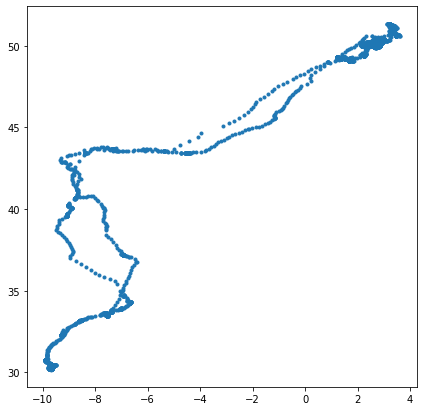

In [6]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, ".")

In [7]:
bird_names = pd.unique(birddata.bird_name)

In [8]:
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

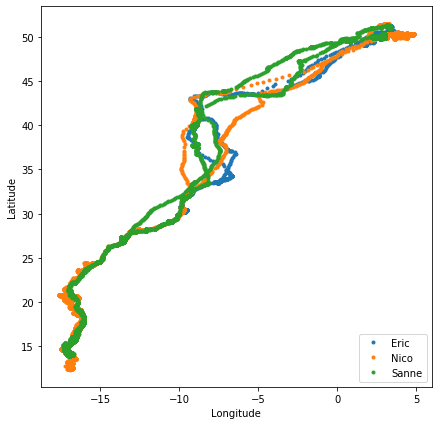

In [9]:
plt.figure(figsize=(7, 7))
for bird_name in bird_names:
  ix = birddata.bird_name == bird_name
  x, y = birddata.longitude[ix], birddata.latitude[ix]
  plt.plot(x, y, ".", label = bird_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.savefig("3traj.pdf")

In [10]:
birddata.isnull().sum()

Unnamed: 0              0
altitude                0
date_time               0
device_info_serial      0
direction             443
latitude                0
longitude               0
speed_2d              443
bird_name               0
dtype: int64

# Examining Flight Speed

In [11]:
from sklearn.preprocessing import normalize

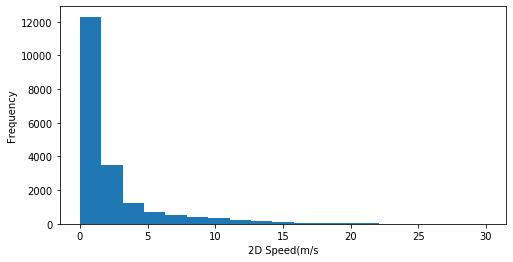

In [12]:
plt.figure(figsize=(8, 4), facecolor="w")
speed = birddata.speed_2d[birddata.bird_name == "Eric"]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins = np.linspace(0, 30, 20))
plt.xlabel("2D Speed(m/s")
plt.ylabel("Frequency");
#plt.savefig("hist.pdf")

In [13]:
print(np.isnan(speed[: 1000]))

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: speed_2d, Length: 1000, dtype: bool


In [14]:
np.isnan(speed).any()

True

In [15]:
np.sum(np.isnan(speed))

85

In [16]:
ind = np.isnan(speed)
ind

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [17]:
~ind

0        True
1        True
2        True
3        True
4        True
         ... 
19790    True
19791    True
19792    True
19793    True
19794    True
Name: speed_2d, Length: 19795, dtype: bool

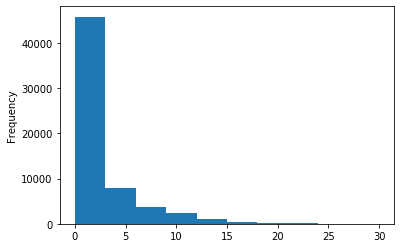

In [18]:
birddata.speed_2d.plot(kind = 'hist', range = [0, 30])

# Using Datetime

In [19]:
birddata.date_time[0:5]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
3    2013-08-15 01:47:51+00
4    2013-08-15 02:17:42+00
Name: date_time, dtype: object

In [20]:
import datetime

In [21]:
time_1 = datetime.datetime.today()

In [22]:
time_2 = datetime.datetime.today()

In [23]:
time_2 - time_1

datetime.timedelta(microseconds=105717)

In [24]:
date_str = birddata.date_time[0]

In [25]:
type(date_str)

str

In [26]:
date_str

'2013-08-15 00:18:08+00'

In [27]:
date_str[: -3]

'2013-08-15 00:18:08'

In [28]:
datetime.datetime.strptime(date_str[: -3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [29]:
birddata.date_time.fillna(method="pad", inplace = True)

In [30]:
timestamps = []
for k in range(len(birddata)):
  timestamps.append(datetime.datetime.strptime\
                    (birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

In [31]:
timestamps[0:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

In [32]:
birddata["timestamp"] = pd.Series(timestamps, index = birddata.index)

In [33]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [34]:
birddata.timestamp[4] - birddata.timestamp[3]

Timedelta('0 days 00:29:51')

In [35]:
times = birddata.timestamp[birddata.bird_name == "Eric"]
elapsed_time = [time - times[0] for time in times]

In [36]:
elapsed_time[1000] / datetime.timedelta(hours=1)

290.03333333333336

In [37]:
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)

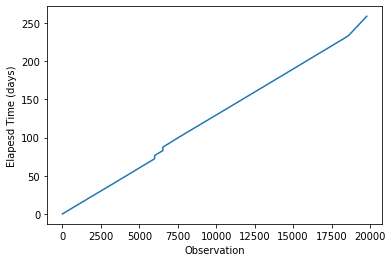

In [38]:
plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapesd Time (days)");
plt.savefig("timeplot.pdf")

In [39]:
help(datetime.datetime.strptime)

Help on built-in function strptime:

strptime(...) method of builtins.type instance
    string, format -> new datetime parsed from a string (like time.strptime()).



# Calculating Daily Mean Speed

In [40]:
data = birddata[birddata.bird_name == "Eric"]
times = data.timestamp
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)

In [41]:
next_day = 1
inds = []
daily_mean_speed = []

In [42]:
for (i, t) in enumerate(elapsed_days):
  if t < next_day:
    inds.append(i)
  else:
    daily_mean_speed.append(np.mean(data.speed_2d[inds]))
    next_day += 1
    inds = []

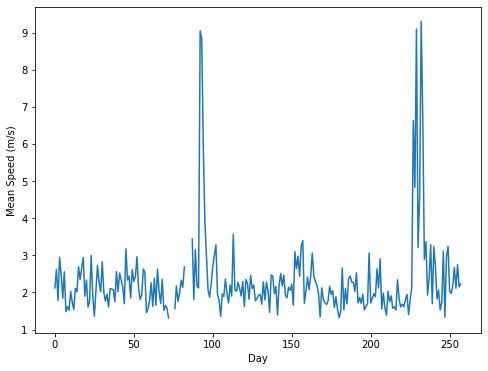

In [43]:
plt.figure(figsize=(8, 6), facecolor='w')
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean Speed (m/s)");
plt.savefig("dms.pdf")

In [44]:
times = birddata.timestamp[birddata.bird_name == "Sanne"]
times

40916   2013-08-15 00:01:08
40917   2013-08-15 00:31:00
40918   2013-08-15 01:01:19
40919   2013-08-15 01:31:38
40920   2013-08-15 02:01:24
                ...        
61915   2014-04-30 22:00:08
61916   2014-04-30 22:29:57
61917   2014-04-30 22:59:52
61918   2014-04-30 23:29:43
61919   2014-04-30 23:59:34
Name: timestamp, Length: 21004, dtype: datetime64[ns]

# Using the Cartopy Library

In [45]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [46]:
proj = ccrs.Mercator()

C:\Users\indra\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\indra\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\indra\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


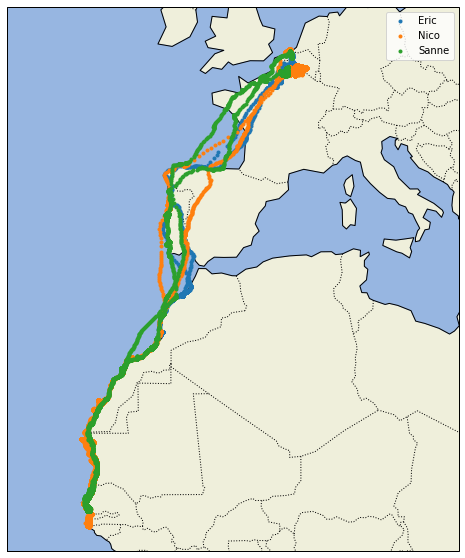

In [50]:
plt.figure(figsize=(10, 10), facecolor='w')
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
for name in bird_names:
  ix = birddata['bird_name'] == name
  x, y = birddata.longitude[ix], birddata.latitude[ix]
  ax.plot(x, y, '.', transform=ccrs.Geodetic(), label=name)
plt.legend()
plt.savefig("map.pdf")